# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

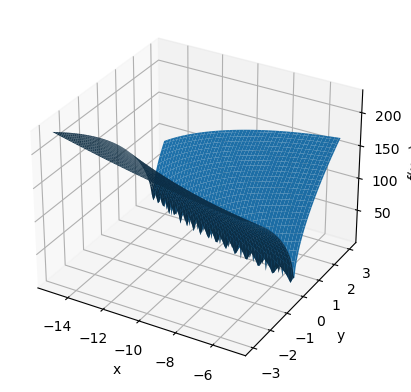

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def bukin(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * (x ** 2))) + 0.01 * np.abs(x + 10)

# define the range of x and y values
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)

# create a grid of x and y values to plot
X, Y = np.meshgrid(x, y)

# compute the value of the Bukin function N6 at each (x, y) point on the grid
Z = bukin(X, Y)

# create a new figure
fig = plt.figure()

# add a 3D subplot to the figure
ax = fig.add_subplot(111, projection = '3d')

# labels for x, y and f(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# plot the Bukin function N6 as a surface
ax.plot_surface(X, Y, Z)

plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [2]:
class HillClimb:
    def __init__(self, initial_state, step_size):
        self.current_state = initial_state
        self.step_size = step_size
    
    def get_neighbors(self):
        neighbor_states = []
        for i in [-1, 1]:
            for j in [-1, 1]:
                new_state = [self.current_state[0] + i*self.step_size, 
                             self.current_state[1] + j*self.step_size*np.sqrt(abs(self.current_state[0] + 0.01*self.current_state[1]))]
                neighbor_states.append(new_state)
        return neighbor_states
    
    def evaluate_state(self, state):
        x, y = state
        return bukin(x,y)
    
    def hill_climb(self, max_iter=1000):
        current_eval = self.evaluate_state(self.current_state)
        for i in range(max_iter):
            neighbors = self.get_neighbors()
            neighbor_evals = [self.evaluate_state(state) for state in neighbors]
            best_neighbor_eval = min(neighbor_evals)
            if best_neighbor_eval < current_eval:
                best_neighbor_idx = neighbor_evals.index(best_neighbor_eval)
                self.current_state = neighbors[best_neighbor_idx]
                current_eval = best_neighbor_eval
            else:
                return self.current_state, current_eval
        return self.current_state, current_eval

initial_state = [-10, 1]
step_size = 0.1
hill_climb = HillClimb(initial_state, step_size)
minimum_state, minimum_value = hill_climb.hill_climb()

print(f"Minimum found at x = {minimum_state[0]}, y = {minimum_state[1]} with value {minimum_value}")

Minimum found at x = -10, y = 1 with value 0.0


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [3]:
# initial state
def knapsack_value(solution, values, weights, capacity):
    # calculate the total value and weight
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    
    # penalize the total value if the total weight exceeds the capacity
    if total_weight > capacity:
        total_value -= (total_weight - capacity) * np.mean(values)
    
    return total_value

# hill climbing
def hill_climbing_knapsack(values, weights, capacity, max_iterations=1000):
    n = len(values)
    current_solution = np.zeros(n) # empty string of n zeros
    
    # create a random initial solution
    current_value = knapsack_value(current_solution, values, weights, capacity)
    
    for _ in range(max_iterations): # neighbour creation
        neighbor_solution = current_solution.copy()
        index = np.random.randint(n)
        neighbor_solution[index] = 1 - neighbor_solution[index]
        
        # calculate the value of the neighbor solution
        neighbor_value = knapsack_value(neighbor_solution, values, weights, capacity)
        
        # update the current solution
        if neighbor_value > current_value:
            current_solution = neighbor_solution
            current_value = neighbor_value
        
        # check the stop criterion
        if np.all(current_solution == 1) or np.all(current_solution == 0): # stop criterion
            break
    
    return current_solution.astype(int)

# test the hill climbing algorithm
values = np.array([10, 25, 15, 30, 20])
weights = np.array([5, 10, 8, 15, 12])
capacity = 30

# find the solution
solution = hill_climbing_knapsack(values, weights, capacity)

print(solution, ": ", knapsack_value(solution, values, weights, capacity))


[1 0 1 0 1] :  45



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [4]:
# restarts
def hill_climbing_knapsack_improved(values, weights, capacity, num_restarts=10, max_iterations=1000):
    best_solution = None
    best_value = -np.inf
    
    # run the hill climbing algorithm for num_restarts times
    for _ in range(num_restarts):
        solution = hill_climbing_knapsack(values, weights, capacity, max_iterations)
        value = knapsack_value(solution, values, weights, capacity)
        
        # update the best solution
        if value > best_value:
            best_solution = solution
            best_value = value
    
    return best_solution

# test the hill climbing algorithm with random restarts
solution = hill_climbing_knapsack_improved(values, weights, capacity)
print(solution, ": ", knapsack_value(solution, values, weights, capacity))

[1 1 0 1 0] :  65
